In [7]:
import cv2
import pandas as pd
import os
from ultralytics import YOLO

In [8]:
data = pd.read_csv("datasets/Wildfire-Smoke/train/_annotations.csv")

In [ ]:
output_dir = "result"
os.makedirs(output_dir, exist_ok=True)
images_dir = "datasets/Wildfire-Smoke/train/"

for index, row in data.iterrows():
    filename = row["filename"]
    image_path = os.path.join(images_dir, filename)
    
    image = cv2.imread(image_path)
    if image is None:
        print(f"Не удалось загрузить изображение: {filename}")
        continue
    
    xmin, ymin, xmax, ymax = int(row["xmin"]), int(row["ymin"]), int(row["xmax"]), int(row["ymax"])
    
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, image)

    print(f"Обработано: {filename}")

print("Обработка завершена!")

In [4]:
model = YOLO('yolov5s.pt')

model.train(data='datasets/Wildfire-Smoke/data.yaml', epochs=15, imgsz=640)

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.
New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.39 🚀 Python-3.11.2 torch-2.2.2 CPU (Intel Core(TM) i5-8257U 1.40GHz)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=datasets/Wildfire-Smoke/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_jso

train: Scanning /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/datasets/Wildfire-Smoke/train.cache... 233 images, 0 backgrounds, 0 corrupt: 100%|██████████| 233/233 [00:00<?, ?it/s]
val: Scanning /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/datasets/Wildfire-Smoke/valid.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]


Plotting labels to /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.675      3.007      1.661         22        640: 100%|██████████| 15/15 [04:46<00:00, 19.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.89s/it]

                   all         56         56      0.406        0.5      0.405      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G      1.547      1.864      1.479         16        640: 100%|██████████| 15/15 [04:30<00:00, 18.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.06s/it]

                   all         56         56      0.501      0.464      0.422      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G       1.52      1.586      1.464         22        640: 100%|██████████| 15/15 [04:30<00:00, 18.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.12s/it]

                   all         56         56      0.273      0.571      0.257      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G      1.575      1.357      1.522         19        640: 100%|██████████| 15/15 [04:25<00:00, 17.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.13s/it]

                   all         56         56      0.316      0.321      0.246     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G      1.613      1.368      1.535         14        640: 100%|██████████| 15/15 [04:53<00:00, 19.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         56         56      0.313      0.482      0.376      0.193


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15         0G      1.819      1.616      1.667          9        640: 100%|██████████| 15/15 [04:20<00:00, 17.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.82s/it]

                   all         56         56      0.111      0.571      0.177     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15         0G      1.697      1.505      1.586          9        640: 100%|██████████| 15/15 [04:21<00:00, 17.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.78s/it]

                   all         56         56      0.264      0.554       0.28      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15         0G      1.705      1.557      1.636          9        640: 100%|██████████| 15/15 [04:23<00:00, 17.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.84s/it]

                   all         56         56      0.244      0.393      0.269      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G      1.575      1.357      1.549          9        640: 100%|██████████| 15/15 [6:38:41<00:00, 1594.80s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.80s/it]

                   all         56         56      0.602       0.46      0.505       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G      1.523      1.156      1.534          9        640: 100%|██████████| 15/15 [04:07<00:00, 16.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.78s/it]

                   all         56         56      0.454      0.321      0.364      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         0G      1.497      1.088      1.503          9        640: 100%|██████████| 15/15 [04:06<00:00, 16.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         56         56      0.495      0.577      0.492      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G      1.503      1.124      1.485          9        640: 100%|██████████| 15/15 [04:09<00:00, 16.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.75s/it]

                   all         56         56      0.657      0.718      0.681      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15         0G      1.334          1      1.419          9        640: 100%|██████████| 15/15 [18:14<00:00, 72.94s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.06s/it]

                   all         56         56      0.886      0.836      0.915      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15         0G      1.336      0.948      1.363          9        640: 100%|██████████| 15/15 [04:09<00:00, 16.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.77s/it]

                   all         56         56      0.938      0.821      0.928      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G      1.273     0.8845      1.329          9        640: 100%|██████████| 15/15 [48:19<00:00, 193.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         56         56       0.85      0.912      0.942      0.581



15 epochs completed in 8.681 hours.
Optimizer stripped from /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/runs/detect/train/weights/best.pt, 18.5MB

Validating /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.11.2 torch-2.2.2 CPU (Intel Core(TM) i5-8257U 1.40GHz)
YOLOv5s summary (fused): 193 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]


                   all         56         56       0.85      0.913      0.942      0.578
Speed: 2.7ms preprocess, 158.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x137d80d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

In [8]:
test_model = YOLO("runs/detect/train2/weights/best.pt")

metrics = test_model.val(data='datasets/Wildfire-Smoke/data.yaml', split='test')
print(metrics)

Ultralytics 8.3.39 🚀 Python-3.11.2 torch-2.2.2 CPU (Intel Core(TM) i5-8257U 1.40GHz)
YOLOv5s summary (fused): 193 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs


val: Scanning /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/datasets/Wildfire-Smoke/test... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<00:00, 1471.42it/s]

val: New cache created: /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/datasets/Wildfire-Smoke/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.35s/it]


                   all         39         39       0.86      0.744      0.861      0.527
Speed: 3.0ms preprocess, 169.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /Users/baiturtashbaev/Documents/Байтур/Projects/Course Arbeit/INAI_MedFire/runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x128ce7310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027, 

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_metrics_images(base_dir, subdir, metrics_files):
    """
    Функция для отображения изображений метрик из указанной директории.

    Args:
        base_dir (str): Базовая директория.
        subdir (str): Поддиректория (например, "train" или "val2").
        metrics_files (list): Список имен файлов метрик для отображения.

    Returns:
        None
    """
    dir_path = os.path.join(base_dir, subdir)
    metrics_images = []
    
    if os.path.exists(dir_path):
        for file in metrics_files:
            file_path = os.path.join(dir_path, file)
            if os.path.exists(file_path):
                metrics_images.append(file_path)
    else:
        print(f"Директория {dir_path} не найдена.")
        return
    
    if metrics_images:
        plt.figure(figsize=(8, len(metrics_images) * 6))
        for i, img_path in enumerate(metrics_images, start=1):
            img = Image.open(img_path)
            plt.subplot(len(metrics_images), 1, i)
            plt.imshow(img)
            plt.axis("off")
            plt.title(os.path.basename(img_path), fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Изображения метрик для директории {subdir} не найдены.")


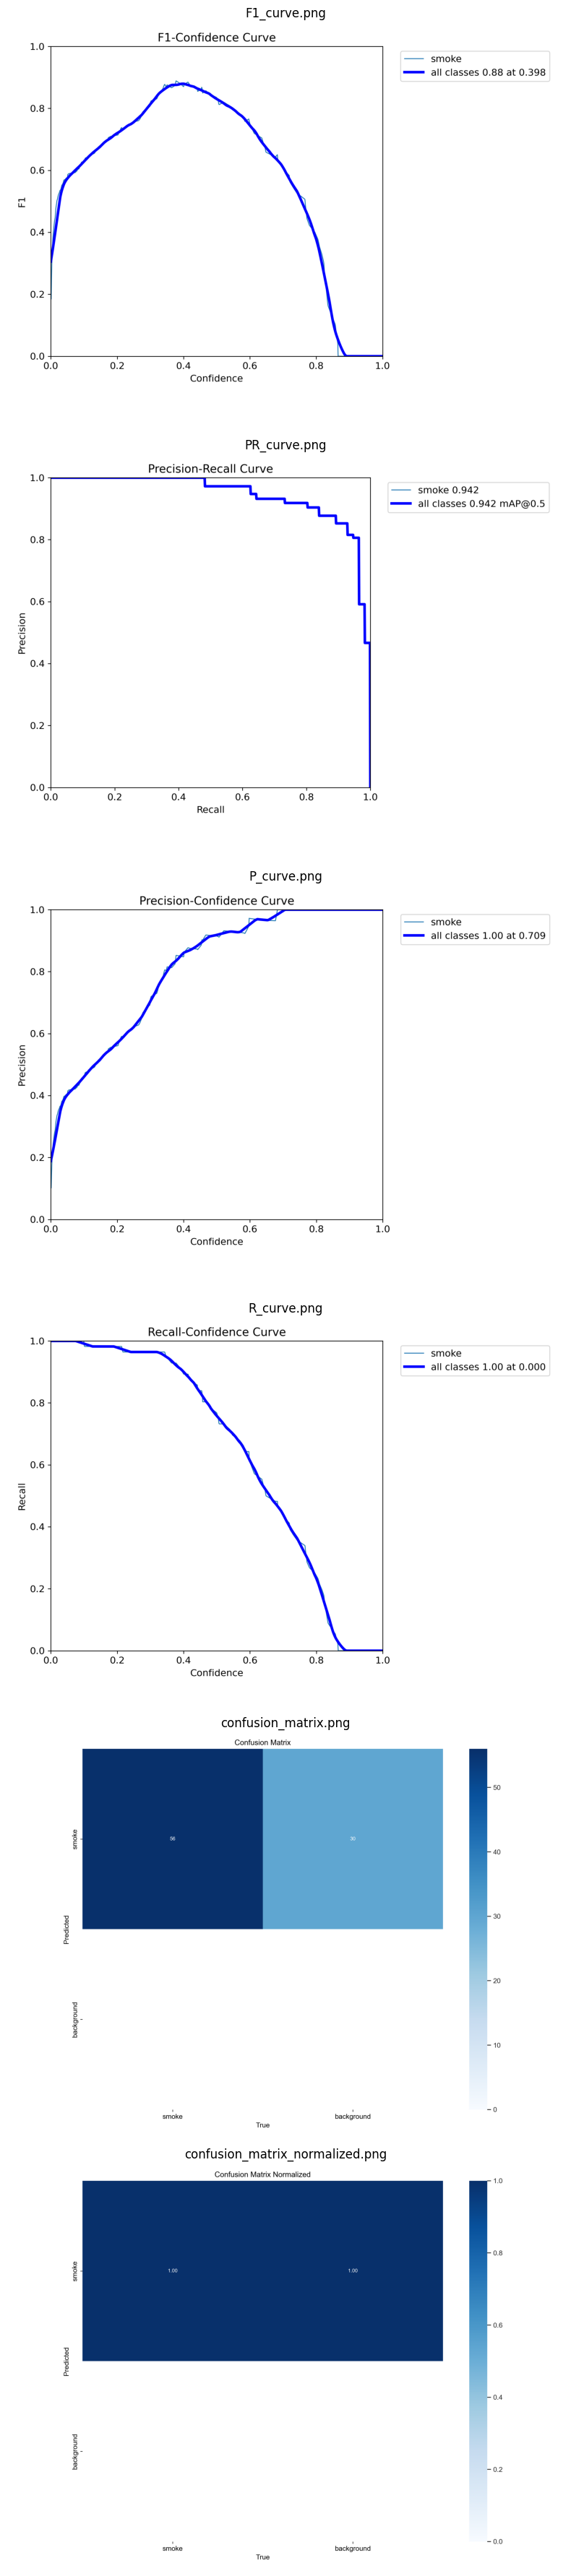

In [5]:
metrics_files = ["F1_curve.png", "PR_curve.png", "P_curve.png", "R_curve.png", 
                 "confusion_matrix.png", "confusion_matrix_normalized.png"]

plot_metrics_images("runs/detect", "train", metrics_files)

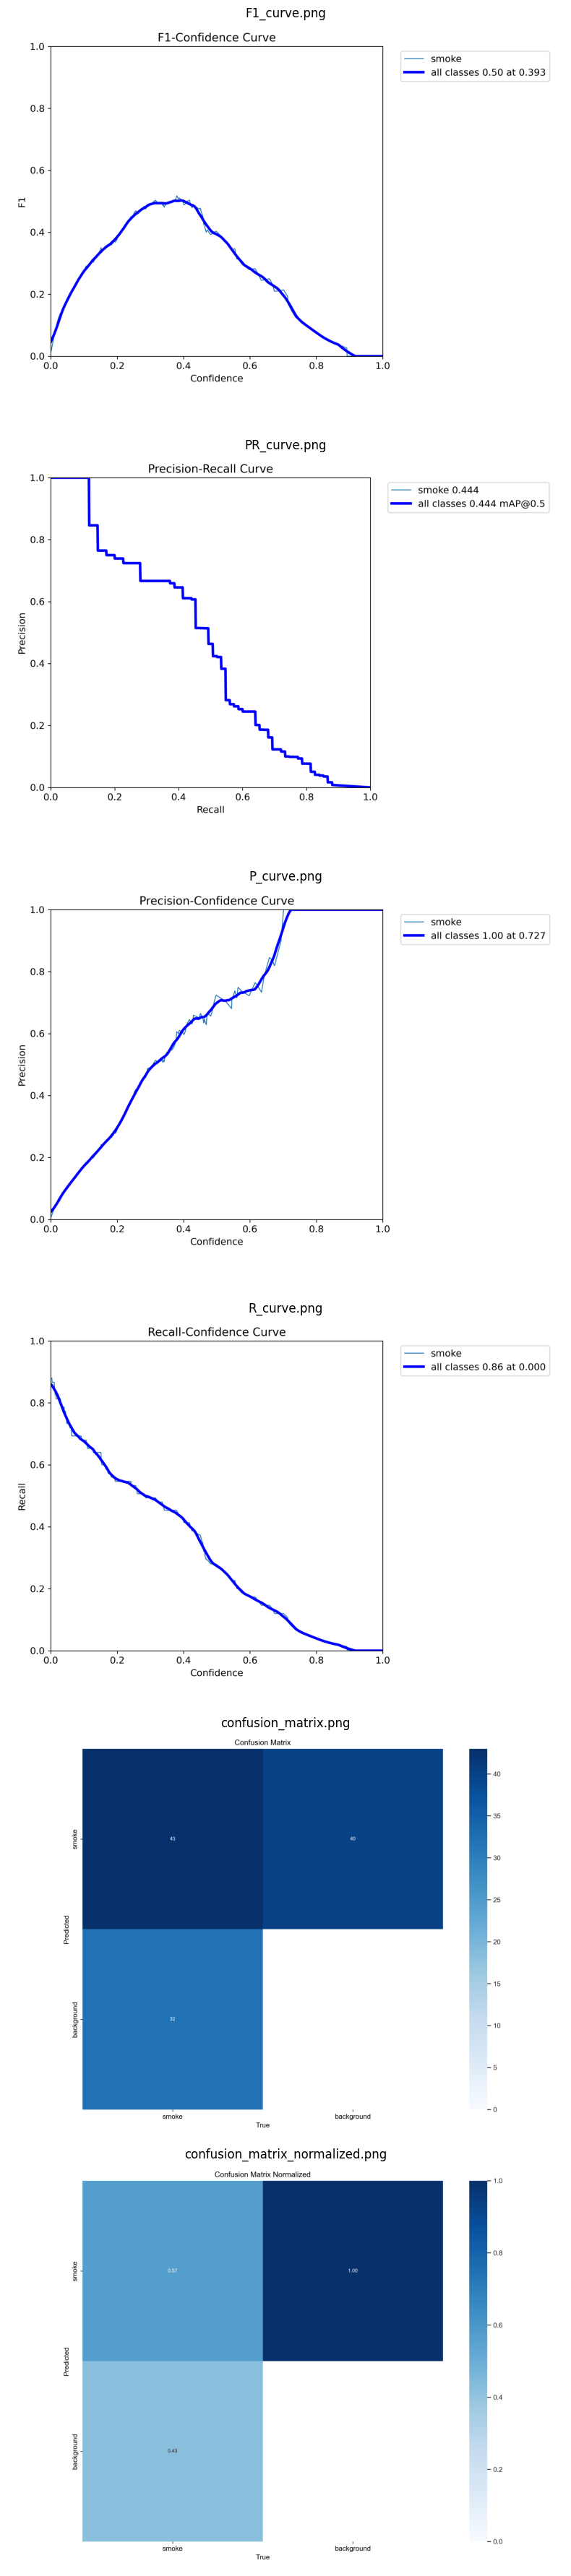

In [6]:
plot_metrics_images("runs/detect", "val2", metrics_files)

Проект: Обнаружение пожаров с использованием YOLOv5
Введение
Проект направлен на разработку модели машинного обучения для автоматического обнаружения пожаров в лесах с использованием алгоритма YOLOv5 (You Only Look Once). Модель обучается на изображениях, содержащих объекты, связанные с лесными пожарами, такие как дым или огонь. Цель проекта — создать систему, которая может точно и быстро обнаруживать такие события для раннего предупреждения.

Описание модели YOLOv5
YOLOv5 — это одна из наиболее популярных и эффективных моделей для задачи детекции объектов. Эта модель использует сверточные нейронные сети (CNN) и предлагает высокую скорость работы, что делает её пригодной для реального времени.

Основные характеристики YOLOv5:

Архитектура: Включает 193 слоя, 9,1 миллиона параметров.
Тип: YOLOv5s (самая легкая версия).
Предсказания: Модель обучена для предсказания прямоугольных рамок вокруг объектов (bounding boxes) и их классов (например, "дым" или "огонь").
Датасет
Для обучения модели использовался датасет Wildfire-Smoke, который включает изображения с различными сценами лесных пожаров. Датасет содержит следующие ключевые элементы:

Классы объектов: Дым, огонь.
Формат: Каждый снимок аннотирован с помощью XML-файлов, в которых указаны координаты рамок объектов (xmin, ymin, xmax, ymax), а также классы объектов.
Пример: Для каждого изображения предоставляется метка с координатами объектов и их типами.
Конвертация данных в формат YOLO
Для обучения модели YOLOv5, аннотации в формате CSV были преобразованы в формат текста, подходящий для YOLO. Преобразования включают нормализацию координат объектов относительно размеров изображения. Вот пример кода для конвертации данных:

```python
import pandas as pd
import os

def convert_to_yolo(csv_path, output_dir, images_dir):
    data = pd.read_csv(csv_path)

    for index, row in data.iterrows():
        filename = row["filename"]
        width, height = row["width"], row["height"]
        xmin, ymin, xmax, ymax = row["xmin"], row["ymin"], row["xmax"], row["ymax"]

        x_center = ((xmin + xmax) / 2) / width
        y_center = ((ymin + ymax) / 2) / height
        bbox_width = (xmax - xmin) / width
        bbox_height = (ymax - ymin) / height

        label_path = os.path.join(output_dir, filename.replace('.jpg', '.txt'))
        with open(label_path, 'w') as f:
            f.write(f"0 {x_center} {y_center} {bbox_width} {bbox_height}\n")

if __name__ == "__main__":
    base_dir = "datasets/Wildfire-Smoke/"
    subsets = ["train", "valid", "test"]

    for subset in subsets:
        csv_path = os.path.join(base_dir, subset, "_annotations.csv")
        output_dir = os.path.join(base_dir, subset)
        images_dir = os.path.join(base_dir, subset)

        convert_to_yolo(csv_path, output_dir, images_dir)
        print(f"Конвертация завершена для {subset}")
```
Этот скрипт конвертирует аннотации в формате CSV в текстовые файлы, необходимые для обучения модели YOLO.

Результаты обучения
Статистика обучения
В ходе тренировки модели в течение 15 эпох были получены следующие результаты:

less
Code kopieren
Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
1/15         0G      1.675      3.007      1.661         22        640: 100%|██████████| 15/15 [04:46<00:00, 19.07s/it]
Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.89s/it]
all         56         56      0.406        0.5      0.405      0.172
Детали:

GPU память: Используемая память видеокарты на протяжении эпох.
box_loss, cls_loss, dfl_loss: Потери, связанные с предсказанием рамок, классификацией и вероятностным распределением.
mAP50: Средняя точность на пороге IoU 50%.
mAP50-95: Средняя точность на порогах IoU от 50% до 95%.
Прогресс по эпохам
1-я эпоха:

mAP50: 0.405
mAP50-95: 0.172
Точность: 40.6%
Полнота: 50%
5-я эпоха:

mAP50: 0.376
mAP50-95: 0.193
Точность: 31.3%
Полнота: 48.2%
10-я эпоха:

mAP50: 0.364
mAP50-95: 0.137
Точность: 45.4%
Полнота: 32.1%
15-я эпоха (финальные результаты):

mAP50: 0.942
mAP50-95: 0.578
Точность: 85%
Полнота: 91.2%
Эти результаты показывают, что модель значительно улучшила свои предсказания за 15 эпох, достигая высокой точности на последней эпохе.

Валидация после тренировки
После завершения обучения модель была протестирована на валидационных данных. Результаты валидации показали высокие показатели:

P (Precision): 0.85
R (Recall): 0.91
mAP50: 0.942
mAP50-95: 0.578
Скорость обработки одного изображения:

Препроцессинг: 2.7 мс
Инференс: 158.2 мс
Постобработка: 0.8 мс
Это говорит о том, что модель работает достаточно быстро и с высокой точностью.

Заключение
Модель YOLOv5, обученная на датасете Wildfire-Smoke, показала отличные результаты в задаче обнаружения пожаров и дыма в лесах. С увеличением количества эпох точность и полнота модели значительно улучшались. Валидационные результаты демонстрируют, что модель может эффективно использоваться для мониторинга лесных пожаров и для предоставления ранних предупреждений.

Модель также быстро обрабатывает изображения, что делает её подходящей для использования в реальных условиях.